In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
data = pd.read_csv('behaviour_simulation_train.csv')

In [21]:
data['inferred company'].describe()

count          300000
unique            220
top       independent
freq            39248
Name: inferred company, dtype: object

In [123]:
data['inferred company'].value_counts()

inferred company
independent     39248
cnn             23768
cisco           19309
cbc             15579
free            13456
                ...  
nn                  2
henry schein        2
singtel             1
midea               1
talbots             1
Name: count, Length: 220, dtype: int64

In [24]:
data['username'].describe()

count             300000
unique              2449
top       IndependentNGR
freq               32295
Name: username, dtype: object

In [28]:
data['likes'].value_counts()

likes
0         41230
1         20159
2          9393
3          8032
4          6556
          ...  
130791        1
24525         1
5298          1
10825         1
42226         1
Name: count, Length: 11015, dtype: int64

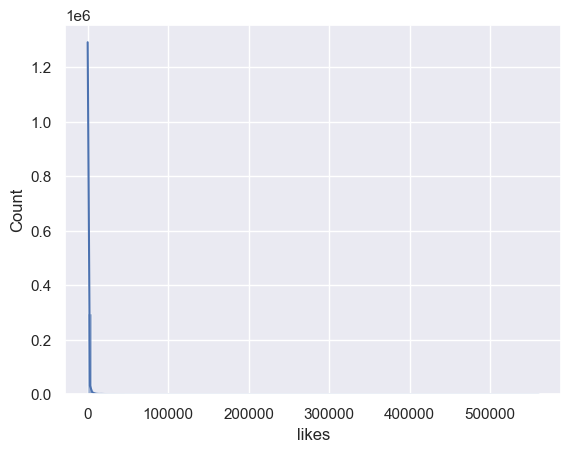

In [43]:
sns.histplot(data['likes'], bins = 100, kde = True)
plt.show()

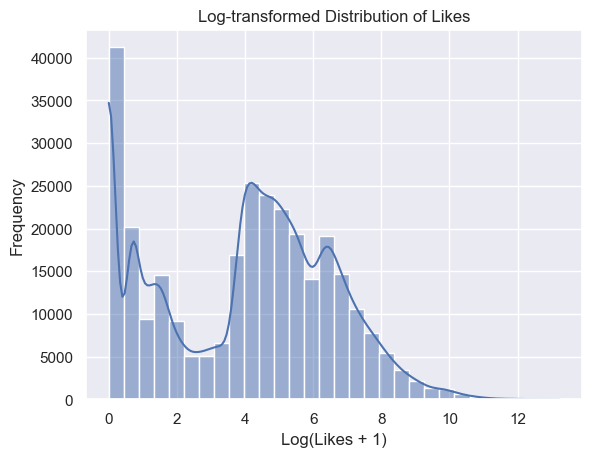

In [45]:
data['log_likes'] = np.log1p(data['likes'])

sns.histplot(data['log_likes'], bins=30, kde=True)
plt.title('Log-transformed Distribution of Likes')
plt.xlabel('Log(Likes + 1)')
plt.ylabel('Frequency')
plt.show()

In [23]:
data['likes'].max()

560193

In [50]:
data['date']

0        2020-12-12 00:47:00
1        2018-06-30 10:04:20
2        2020-09-29 19:47:28
3        2020-10-01 11:40:09
4        2018-10-19 14:30:46
                 ...        
299995   2019-09-07 16:18:10
299996   2018-02-23 11:24:36
299997   2020-11-11 20:18:15
299998   2019-10-29 10:44:00
299999   2018-08-26 01:19:09
Name: date, Length: 300000, dtype: datetime64[ns]

In [48]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')

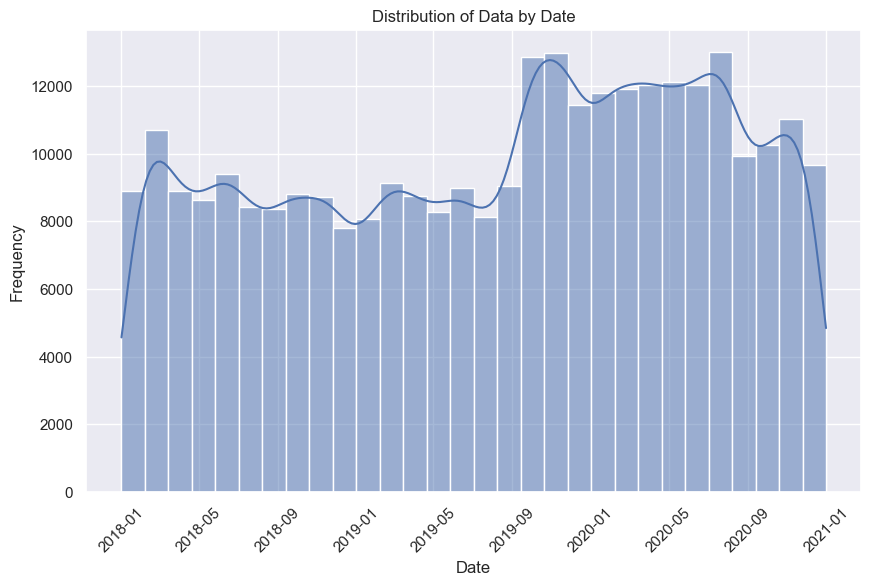

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(data['date'], bins=30, kde=True)
plt.title('Distribution of Data by Date')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [65]:
data.loc[data['media'].apply(lambda x: x[1] == 'P')]['media'][0]

"[Photo(previewUrl='https://pbs.twimg.com/media/Eo8N3JLVoAAlDJT?format=jpg&name=small', fullUrl='https://pbs.twimg.com/media/Eo8N3JLVoAAlDJT?format=jpg&name=large')]"

In [64]:
data.loc[data['media'].apply(lambda x: x[1] == 'V')]['media'][5]

"[Video(thumbnailUrl='https://pbs.twimg.com/amplify_video_thumb/1322382278794858496/img/eKRa2rXniZ_eOCNB.jpg', variants=[VideoVariant(contentType='application/x-mpegURL', url='https://video.twimg.com/amplify_video/1322382278794858496/pl/cFQbZqH2I81CcDHU.m3u8?tag=13', bitrate=None), VideoVariant(contentType='video/mp4', url='https://video.twimg.com/amplify_video/1322382278794858496/vid/1280x720/Zz0AxPDI2x6hO29a.mp4?tag=13', bitrate=2176000), VideoVariant(contentType='video/mp4', url='https://video.twimg.com/amplify_video/1322382278794858496/vid/640x360/ROzx5DbECg35uopU.mp4?tag=13', bitrate=832000), VideoVariant(contentType='video/mp4', url='https://video.twimg.com/amplify_video/1322382278794858496/vid/480x270/5Fx4A4yzGMvLpTUH.mp4?tag=13', bitrate=288000)], duration=65.432, views=572671)]"

In [88]:
company_username_counts = data.groupby('inferred company')['username'].nunique().reset_index()
company_username_counts.columns = ['inferred company', 'unique_username_count']
print(company_username_counts.max())

inferred company         zumba
unique_username_count      375
dtype: object


In [91]:
company_counts = data.groupby('username')['inferred company'].nunique().reset_index()
company_counts.columns = ['username', 'unique_company_count']
print(company_counts)

            username  unique_company_count
0       1MjWilliams2                     1
1     1MollyWilliams                     1
2         1jamiebell                     1
3        1jordanbell                     1
4            36SLY36                     1
...              ...                   ...
2444     yourschools                     1
2445     zach_hudson                     1
2446    zacharyebell                     1
2447    zachwilliams                     1
2448           zumba                     1

[2449 rows x 2 columns]


In [99]:
print(data['likes'].mean())
print(data['log_likes'].mean())

773.3647933333333
3.954602861193395


In [126]:
data.loc[data['inferred company'] == 'independent']['content']

1         Watch rapper <mention> freestyle for over an H...
4         Congratulations to Pauletha Butts of <mention>...
6         LASU Celebrates New Dawn Of Unbroken Peace As ...
18        Linda Ikeji Partners ECOBANK To Empower Young ...
32        Amidst Royal Rumble ln Onicha-Olona Kingdom In...
                                ...                        
299983    'It has been a whirlwind' - Meet the 19-year-o...
299985    NDDC Still Implementing 2018 Budget As FG, Oth...
299986    .　             ┃　\n 　             ┃　　　\n　     ...
299995    Barcelona Star Expected To Return Against Vale...
299998    The US Air Force's mysterious space plane just...
Name: content, Length: 39248, dtype: object

In [148]:
(data.groupby('username')['likes'].mean().reset_index())

,username,likes
0,1MjWilliams2,602.875000
1,1MollyWilliams,191.000000
2,1jamiebell,500.666667
3,1jordanbell,773.375000
4,36SLY36,288.000000
...,...,...
2444,yourschools,59.666667
2445,zach_hudson,292.333333
2446,zacharyebell,107.000000
2447,zachwilliams,186.388060


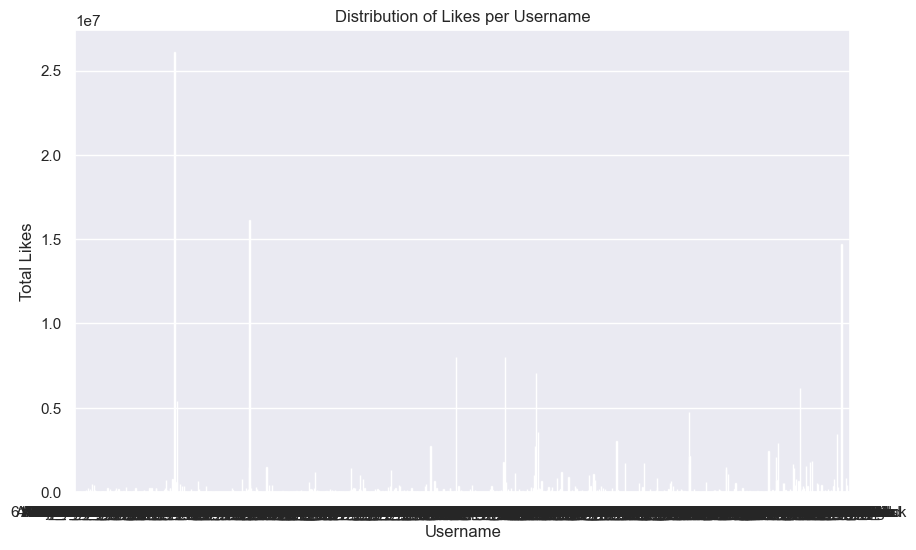

In [153]:
user_likes = data.groupby('username')['likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='username', y='likes', data=user_likes)
plt.title('Distribution of Likes per Username')
plt.xlabel('Username')
plt.ylabel('Total Likes')
plt.show()

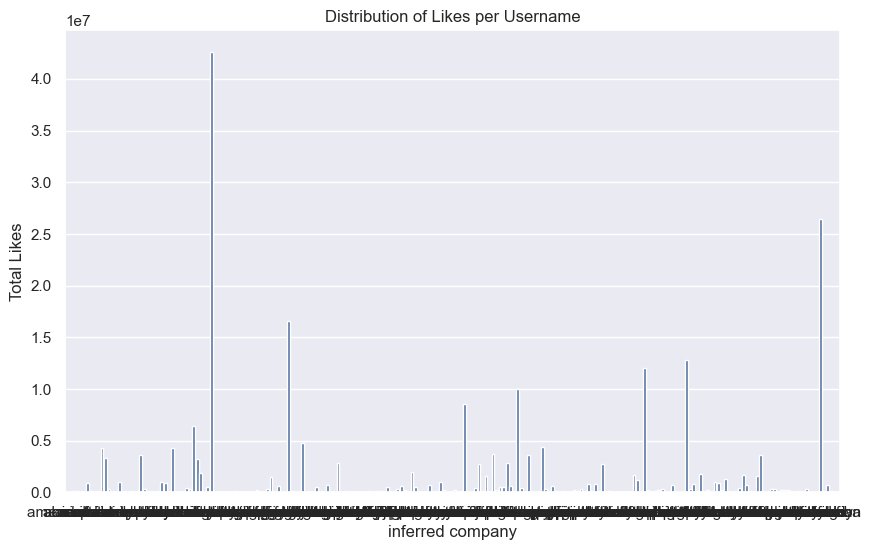

In [154]:
user_likes = data.groupby('inferred company')['likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='inferred company', y='likes', data=user_likes)
plt.title('Distribution of Likes per Username')
plt.xlabel('inferred company')
plt.ylabel('Total Likes')
plt.show()

In [151]:
data.groupby('inferred company')['likes'].mean().reset_index()

,inferred company,likes
0,aa,8.192247
1,aaa,5.535596
2,aarp,262.877049
3,accenture,302.649057
4,acer,235.070866
...,...,...
215,wolseley,145.333333
216,wwf,771.205298
217,yahoo,207.706499
218,ymca,71.489583


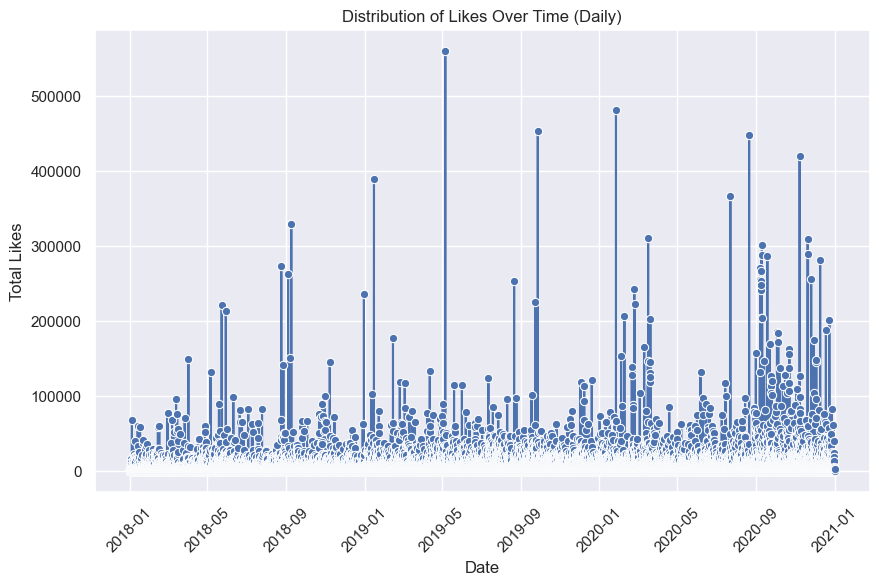

In [155]:
likes_per_day = data.groupby('date')['likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='likes', data=likes_per_day, marker='o')
plt.title('Distribution of Likes Over Time (Daily)')
plt.xlabel('Date')
plt.ylabel('Total Likes')
plt.xticks(rotation=45)
plt.show()

In [173]:
likes_per_day = data.groupby('date')['likes'].sum().reset_index()
likes_per_day.mean()

date     2019-08-02 05:15:59.443237888
likes                       793.734671
dtype: object

In [174]:
likes_per_day.sort_values(by='likes', ascending=False)

,date,likes
115413,2019-05-06 12:58:00,560193
189574,2020-01-27 00:21:39,481440
149932,2019-09-27 09:00:00,453141
256682,2020-08-21 04:00:13,447528
277714,2020-11-07 16:27:38,419288
...,...,...
204983,2020-03-14 23:11:39,0
259896,2020-09-03 03:00:01,0
204982,2020-03-14 23:11:38,0
204981,2020-03-14 23:11:37,0


In [175]:
data['date']

0        2020-12-12 00:47:00
1        2018-06-30 10:04:20
2        2020-09-29 19:47:28
3        2020-10-01 11:40:09
4        2018-10-19 14:30:46
                 ...        
299995   2019-09-07 16:18:10
299996   2018-02-23 11:24:36
299997   2020-11-11 20:18:15
299998   2019-10-29 10:44:00
299999   2018-08-26 01:19:09
Name: date, Length: 300000, dtype: datetime64[ns]

In [189]:
data.loc[data['date'] == '2019-05-06 12:58:00']

,id,date,likes,content,username,media,inferred company,log_likes
275726,275727,2019-05-06 12:58:00,560193,⚠️ SPOILERS AHEAD ⚠️ It’s time to step up. Wat...,SpiderManMovie,[Video(thumbnailUrl='https://pbs.twimg.com/med...,no,13.236038


In [188]:
data.loc[data['username'] == data.iloc[275726]['username']]['likes'].mean()

18414.127516778524

In [198]:
data.loc[data['date'] == '2020-01-27 00:21:39']['media']

225457    [Video(thumbnailUrl='https://pbs.twimg.com/ext...
Name: media, dtype: object

In [208]:
data.loc[data['username'] == data.iloc[225457]['username']]

,id,date,likes,content,username,media,inferred company,log_likes
1190,1191,2020-05-04 16:45:33,6242,Lady Gaga really had the best Met Gala entranc...,sbstryker,[Photo(previewUrl='https://pbs.twimg.com/media...,stryker,8.739216
15324,15325,2020-09-01 03:01:11,1862,NOT LADY GAGA LIKING MY MASK SELFIE IM LITERAL...,sbstryker,[Photo(previewUrl='https://pbs.twimg.com/media...,stryker,7.529943
18959,18960,2020-07-13 19:01:07,22216,"No one, NO ONE, did it like Naya Rivera as San...",sbstryker,[Video(thumbnailUrl='https://pbs.twimg.com/ext...,stryker,10.008613
23923,23924,2020-11-20 00:48:12,6485,When someone grabs the aux cord and tries to p...,sbstryker,[Photo(previewUrl='https://pbs.twimg.com/media...,stryker,8.777401
30189,30190,2020-04-02 03:02:42,1694,I get a little sweaty when I work out 🥺 <hyper...,sbstryker,[Photo(previewUrl='https://pbs.twimg.com/media...,stryker,7.435438
...,...,...,...,...,...,...,...,...
283485,283486,2020-02-10 02:34:02,4209,IDINA’S REACTION TO EMINEM SKSKSKSKSKSKSK <hyp...,sbstryker,[Video(thumbnailUrl='https://pbs.twimg.com/ext...,stryker,8.345218
283884,283885,2019-10-11 02:44:35,2520,The TIMING. The DELIVERY. The TWINKLE IN HER E...,sbstryker,[Video(thumbnailUrl='https://pbs.twimg.com/ext...,stryker,7.832411
284768,284769,2019-12-26 18:37:29,8145,Gays getting rid of their nieces and nephews n...,sbstryker,[Gif(thumbnailUrl='https://pbs.twimg.com/tweet...,stryker,9.005282
293855,293856,2020-10-18 19:17:24,3326,Me going to Best Buy to ask what the differenc...,sbstryker,[Photo(previewUrl='https://pbs.twimg.com/media...,stryker,8.109826


In [213]:
data.iloc[284768]['content']

'Gays getting rid of their nieces and nephews now that Christmas is over and they don’t need them for content anymore <hyperlink>'

In [216]:
test_company = pd.read_csv('behaviour_simulation_test_company.csv')

In [220]:
len(set(test_company['inferred company']) - set(data['inferred company']))

84

In [230]:
len(set(test_company['inferred company']))

84

In [222]:
test_time = pd.read_csv('behaviour_simulation_test_time.csv')

In [226]:
len(set(test_time['inferred company']) - set(data['inferred company']))

2

In [229]:
len(set(test_company['username']) - set(data['username']))

780

In [232]:
test_company.head()

,id,date,content,username,media,inferred company
0,1,2019-01-08 18:03:10,the Heathrow drone right now <hyperlink>,bbcthree,[Photo(previewUrl='https://pbs.twimg.com/media...,bbc
1,2,2018-01-29 10:51:17,A deal at £60m?\n\nThe latest on Pierre-Emeric...,BBCSport,[Photo(previewUrl='https://pbs.twimg.com/media...,bbc
2,3,2019-09-05 07:25:14,"""Dealing with Boris Johnson is like someone de...",BBCPolitics,[Video(thumbnailUrl='https://pbs.twimg.com/med...,bbc
3,4,2018-03-28 18:15:00,Doesn't unlimited food &amp; drinks all night ...,BrdgstoneArena,[Photo(previewUrl='https://pbs.twimg.com/media...,bridgestone
4,5,2019-09-11 21:15:44,Apple Watch Series 5.\n\nYou’ve never seen a w...,BestBuy,[Video(thumbnailUrl='https://pbs.twimg.com/ext...,best buy
